In [4]:
import torch

In [5]:
# globalna pamięć
M=100
# ilość macierzy
N=3
# zakres dla macierzy
rank_min=4 
rank_max=8

In [6]:
# funkcja która alokuje pamięć w zależności od parametrów $w$ 
# potencjalnie może przekroczyć zakres rank_max, ale to nam nie szkodzi

def memory_allocation(w,rank_min):
    N=len(w)
    return rank_min**2+(M-N*rank_min**2)*torch.softmax(w,dim=0)

def rank_allocation(w,rank_min):
    N=len(w)
    return torch.sqrt(rank_min**2+(M-N*rank_min**2)*torch.softmax(w,dim=0))


In [7]:
w=torch.randn(N)
print(w)
rank_allocation(w,rank_min)

tensor([-0.1946, -0.0485,  0.3678])


tensor([5.4122, 5.6021, 6.2709])

In [2]:
import torch
import matplotlib.pyplot as plt

def matrix_mask(p, rank_min, rank_max, A):
    # Rozmiar macierzy A
    N = A.size(0)  # Zakładamy, że A jest macierzą NxN

    # Inicjalizacja macierzy wynikowej
    MA = torch.zeros(N, N)

    # Generowanie i sumowanie masek
    for i in range(rank_min, rank_max+1):  # Zakres od rank_min do rank_max (włącznie)
        tensor = torch.zeros(N, N)
        tensor[:i, :i] = 1  # Maska KxK dla aktualnego i
        MA += p[i - rank_min] *  tensor
    
    return MA

def visualize_matrix(matrix, title="Matrix Visualization"):
    plt.figure(figsize=(6, 6))
    # Ustawienie zakresu wartości vmin=0 (biały), vmax=max(matrix) (czarny)
    plt.imshow(matrix, cmap="gray_r", interpolation="none", vmin=0, vmax=matrix.max())
    plt.colorbar(label="Value")

    # Ustawienia etykiet osi
    num_rows, num_cols = matrix.shape
    plt.xticks(ticks=range(num_cols), labels=range(num_cols))
    plt.yticks(ticks=range(num_rows), labels=range(num_rows))
    
    plt.title(title)
    plt.xlabel("Columns (Index)")
    plt.ylabel("Rows (Index)")
    plt.show()



tensor([0.1150, 0.8024, 0.0827])


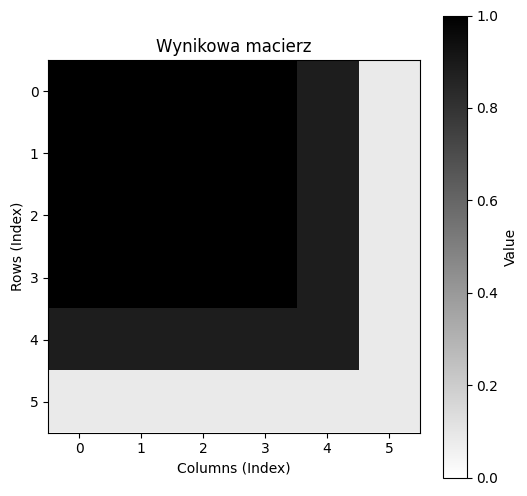

In [3]:
# Przykład użycia
rank_min = 4
rank_max = 6
p=torch.softmax(torch.randn(rank_max-rank_min+1),dim=0)
print(p)

A = torch.ones(rank_max, rank_max)  

# Obliczenie wynikowej macierzy
result = matrix_mask(p, rank_min, rank_max, A)

# Wizualizacja macierzy
visualize_matrix(result.numpy(), title="Wynikowa macierz")


In [4]:
# s to jest parametr
# alfa - przemnazamy wejscie, tau ile gumbela dodajemy, na raize domyślne=0
def prob_dist(s,rank_min,rank_max,alfa,tau=0):
    logits=-alfa*torch.log(1+(s-torch.arange(rank_min,rank_max+1))**2)
    gumbel_dist = torch.distributions.Gumbel(0,1)
    gumbel_vector = gumbel_dist.sample((rank_max+1-rank_min,))
    
    return torch.softmax(logits+tau*gumbel_vector,dim=0)

142600.0

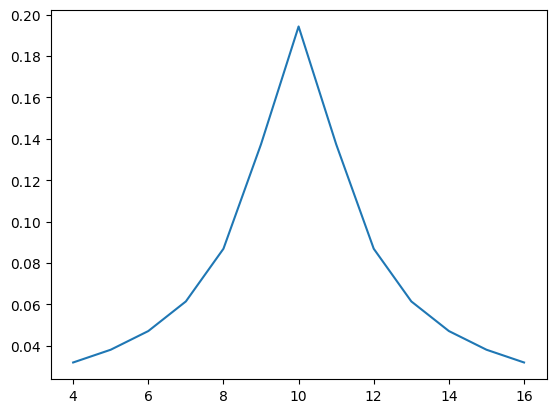

In [5]:
import numpy as np
# Przykład użycia
rank_min = 4
rank_max = 16
s=10
alfa=0.5
plt.plot(np.arange(rank_min,rank_max+1),prob_dist(s,rank_min,rank_max,alfa).numpy())
plt.show()

In [6]:
def matrix_soft(s, rank_min, rank_max, alfa,tau=0):
    A = torch.ones(rank_max, rank_max)  
    p=prob_dist(s,rank_min,rank_max,alfa,tau)
    return(matrix_mask(p, rank_min, rank_max, A))

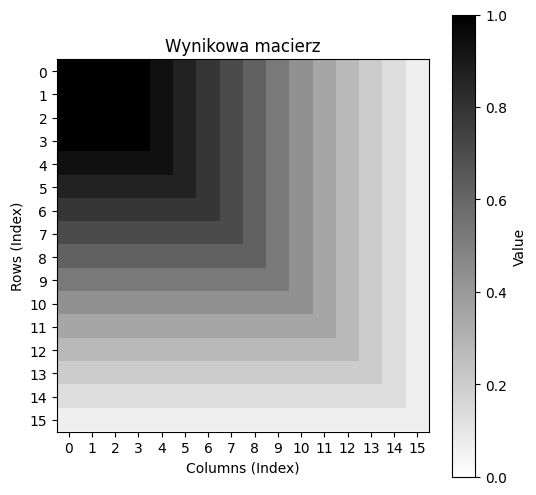

In [7]:
# Obliczenie wynikowej macierzy
# Przykład użycia
rank_min = 4
rank_max = 16
s=9.2

# sterujemy parametrami, jak duże alfa (typu 5), model się dyskretyzuje
# jak alfa=0.1, mamy rozbicie na całą przestrzeń 

#alfa=5
alfa=0.1

result = matrix_soft(s, rank_min, rank_max, alfa)

# Wizualizacja macierzy
visualize_matrix(result.numpy(), title="Wynikowa macierz")